In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [4]:
df=pd.read_csv('/content/AirPassengers.csv')

In [5]:
df=df.rename(columns={'Month':'ds','#Passengers':'y'})

In [6]:
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df['y_orig']=df['y']

In [8]:
df['y']=np.log(df['y'])

In [9]:
df.head()

,ds,y,y_orig
0,1949-01,4.718499,112
1,1949-02,4.770685,118
2,1949-03,4.882802,132
3,1949-04,4.859812,129
4,1949-05,4.795791,121


In [24]:
model=Prophet()
model.add_country_holidays(country_name='US')
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future_data=model.make_future_dataframe(periods=12,freq='M')

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [26]:
forecast_data=model.predict(future_data)

In [27]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Armistice Day,Armistice Day_lower,Armistice Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),Christmas Day (observed)_lower,Christmas Day (observed)_upper,Columbus Day,Columbus Day_lower,Columbus Day_upper,Independence Day,Independence Day_lower,Independence Day_upper,Independence Day (observed),Independence Day (observed)_lower,Independence Day (observed)_upper,Labor Day,Labor Day_lower,Labor Day_upper,Memorial Day,Memorial Day_lower,Memorial Day_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,New Year's Day (observed),New Year's Day (observed)_lower,New Year's Day (observed)_upper,Thanksgiving Day,Thanksgiving Day_lower,Thanksgiving Day_upper,Veterans Day,Veterans Day_lower,Veterans Day_upper,Veterans Day (observed),Veterans Day (observed)_lower,Veterans Day (observed)_upper,Washington's Birthday,Washington's Birthday_lower,Washington's Birthday_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.960768,56.691882,114.754370,106.960768,106.960768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.604859,-6.604859,-6.604859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-22.115438,-22.115438,-22.115438,-6.604859,-6.604859,-6.604859,-15.510579,-15.510579,-15.510579,0.0,0.0,0.0,84.845330
1,1949-02-01,109.136658,48.241687,107.408879,109.136658,109.136658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.733115,-30.733115,-30.733115,0.000000,0.000000,0.000000,-30.733115,-30.733115,-30.733115,0.0,0.0,0.0,78.403543
2,1949-03-01,111.101977,80.231569,135.955796,111.101977,111.101977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.117275,-1.117275,-1.117275,0.000000,0.000000,0.000000,-1.117275,-1.117275,-1.117275,0.0,0.0,0.0,109.984703
3,1949-04-01,113.277867,80.865949,135.182503,113.277867,113.277867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.615247,-5.615247,-5.615247,0.000000,0.000000,0.000000,-5.615247,-5.615247,-5.615247,0.0,0.0,0.0,107.662620
4,1949-05-01,115.383566,81.846782,142.081206,115.383566,115.383566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.316398,-4.316398,-4.316398,0.000000,0.000000,0.000000,-4.316398,-4.316398,-4.316398,0.0,0.0,0.0,111.067169


In [28]:
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
151,1961-07-31,575.876989,544.328806,605.886665
152,1961-08-31,530.771830,503.450457,561.479665
153,1961-09-30,492.792136,463.835470,522.073097
154,1961-10-31,462.882293,436.674992,492.494210
155,1961-11-30,492.429329,465.657430,521.417358


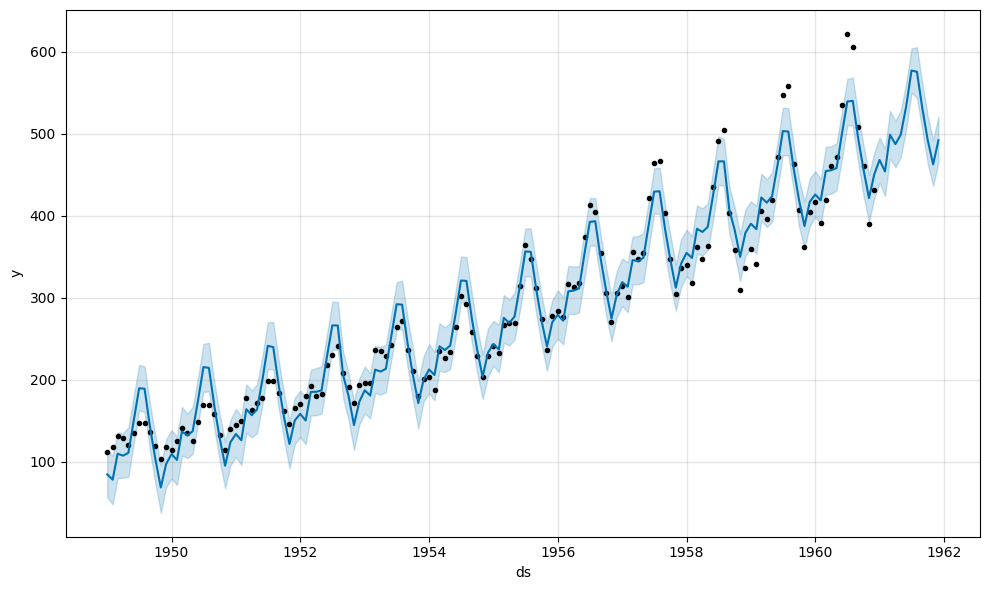

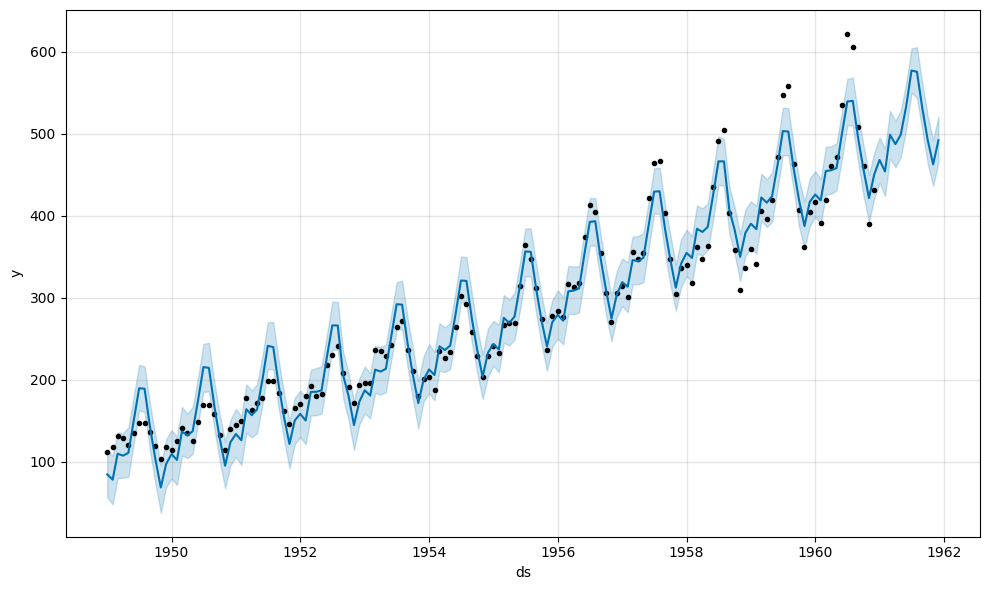

In [29]:
model.plot(forecast_data)

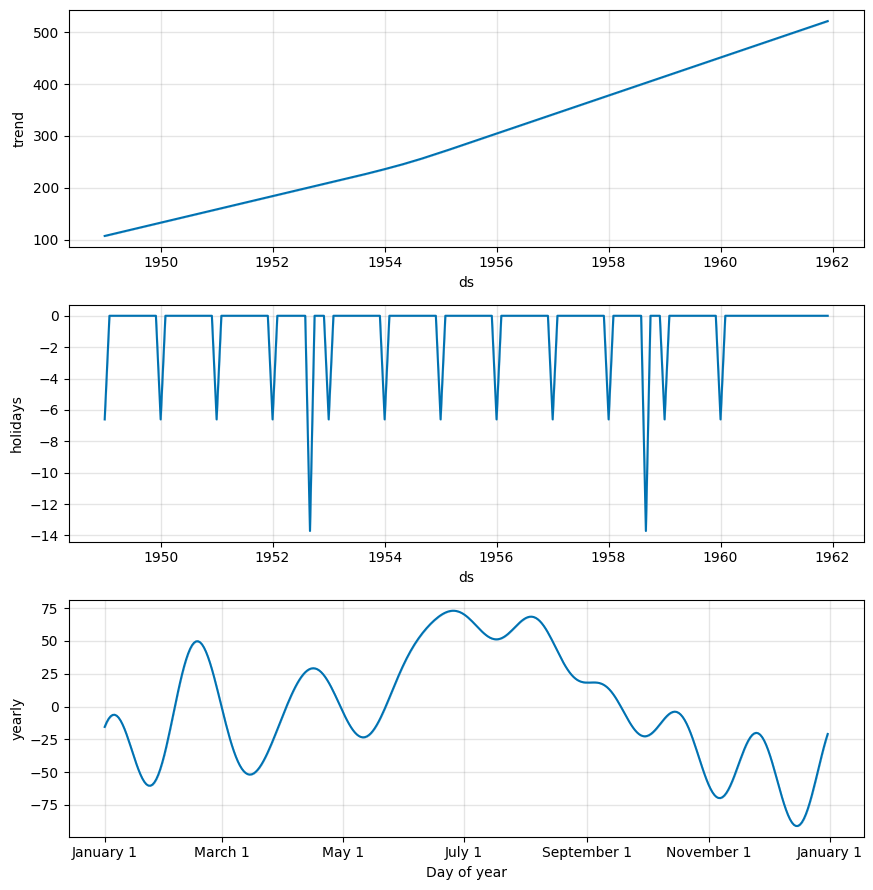

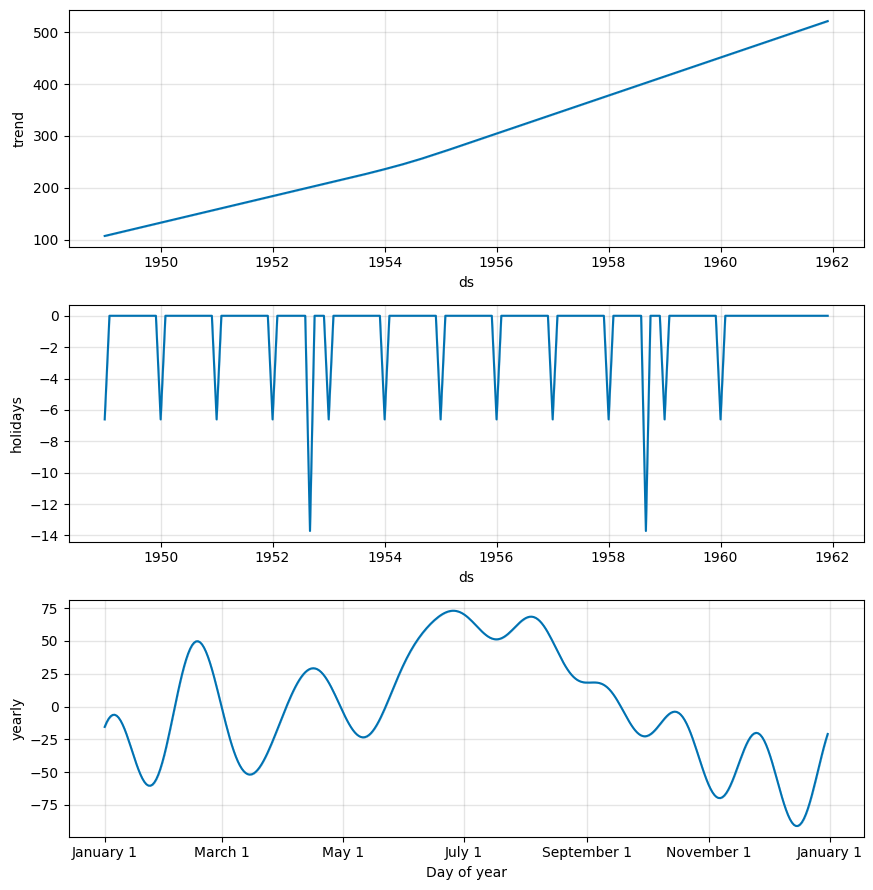

In [30]:
model.plot_components(forecast_data)

In [31]:
forecast_data_orig=forecast_data
forecast_data_orig['yhat']=np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower']=np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper']=np.exp(forecast_data_orig['yhat_upper'])

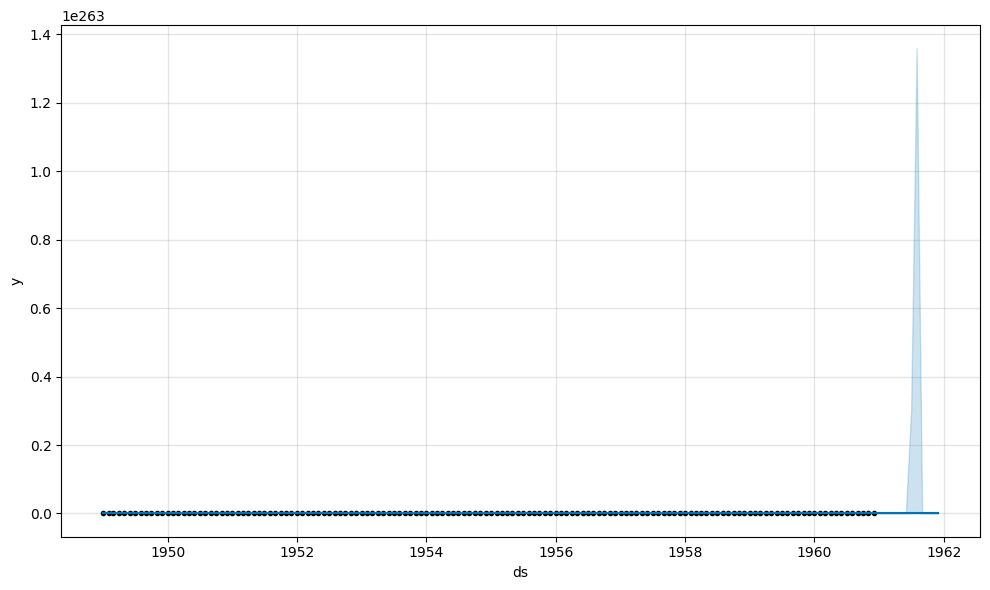

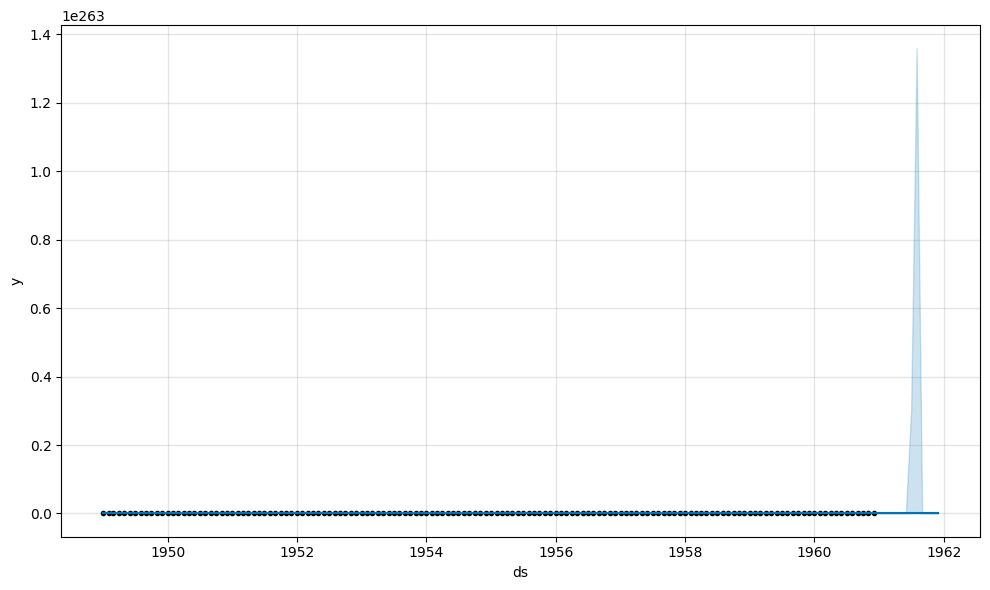

In [37]:
model.plot(forecast_data_orig)

In [33]:
df['y_log']=df['y']
df['y']=df['y_orig']

In [34]:
final_df=pd.DataFrame(forecast_data_orig)

In [35]:
import plotly.graph_objs as go
import plotly.offline as py

In [36]:
actual_chart=go.Scatter(y=df['y_orig'],name='Actual')
predict_chart=go.Scatter(y=final_df['yhat'],name='Predicted')
predict_chart_upper=go.Scatter(y=final_df['yhat_upper'],name='Predicted Upper')
predict_chart_lower=go.Scatter(y=final_df['yhat_lower'],name='Predicted Lower')
py.plot([actual_chart,predict_chart,predict_chart_lower,predict_chart_upper],image_width=400,image_height=400)

'temp-plot.html'